<a href="https://colab.research.google.com/github/RadhikaRM/BikeShareDemandprediction/blob/main/Bike_Sharing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
#importing the required modules and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## *Bringing in the data*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the dataset
bd_df=pd.read_csv("/content/drive/MyDrive/Copy of SeoulBikeData.csv", encoding='ISO-8859-1')

In [ ]:
#displaying the first 5 rows in the dataset
bd_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#inspecting the datatypes of the columns
bd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec


* There are 8760 rows and 14 columns in the given data.
* None of the columns have missing values.
* Except for Date,the other columns have the correct datatypes.


In [ ]:
#displaying the names of columns in the dataframe
bd_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#viewing the statistical summary of the data
bd_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
#Checking for null values
bd_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#Checking for duplicate entries
bd_df[bd_df.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [ ]:
#Converting the datatype of Date column to datatime
bd_df['Date'] = pd.to_datetime(bd_df['Date'], format='%d/%m/%Y')

#Extracting Month,Weekday and Year from the date column
bd_df['Month']=bd_df['Date'].dt.month
bd_df['Days_of_week']=bd_df['Date'].dt.day_name()
bd_df['Year']=bd_df['Date'].dt.year
bd_df['Day']=bd_df['Date'].dt.day

In [ ]:
#Creating a column which specifies  if the day is a Weekend('Y')or not ('N')
bd_df['Weekend']=bd_df['Days_of_week'].apply(lambda x : ('Y') if x in ['Saturday','Sunday'] else ('N'))

In [ ]:
#Displaying the unique values in the categorical columns
categorical_columns=['Seasons','Holiday', 'Functioning Day','Days_of_week','Weekend']

for col in categorical_columns:
  print(f'The unique values in the column {col} are {bd_df[col].unique()}')

The unique values in the column Seasons are ['Winter' 'Spring' 'Summer' 'Autumn']
The unique values in the column Holiday are ['No Holiday' 'Holiday']
The unique values in the column Functioning Day are ['Yes' 'No']
The unique values in the column Days_of_week are ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
The unique values in the column Weekend are ['N' 'Y']


In [ ]:
#Creating a list of numerical columns
numerical_columns=list(bd_df.select_dtypes(exclude=['object','datetime64[ns]']).columns)

In [ ]:
print(numerical_columns)

['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Year', 'Day']


# ***Univariate Analysis***

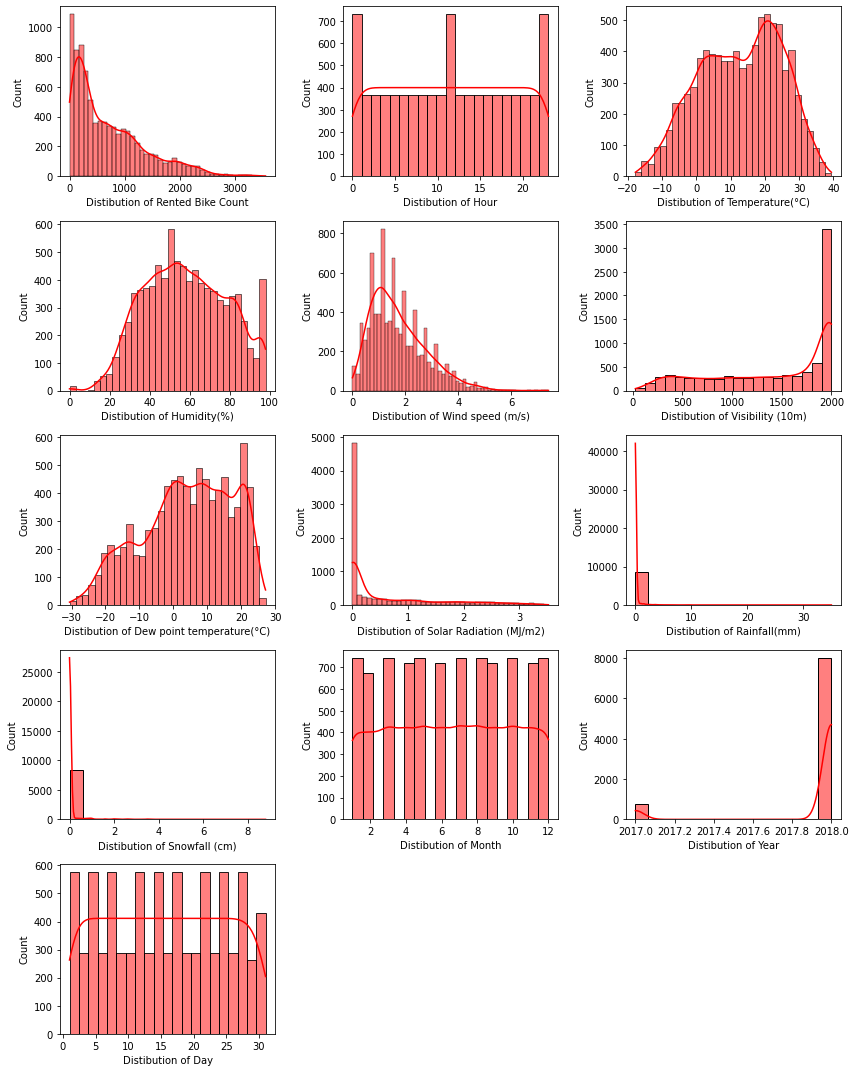

In [ ]:
#Plotting the distibution of numerical columns 

fig = plt.figure(figsize=(12,15))
c=1
for i in numerical_columns :
    plt.subplot(5,3, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.histplot(x=bd_df[i],kde=True,line_kws={'lw': 1.5},color='red')
    c = c + 1
plt.tight_layout()

* Distribution of Temperature,Humidity,Dew point temperature are almost normal.
* Wind speed,Solar Radiation,Rainfall,Snowfall-positively skewed
* Visibility is negatively skewed


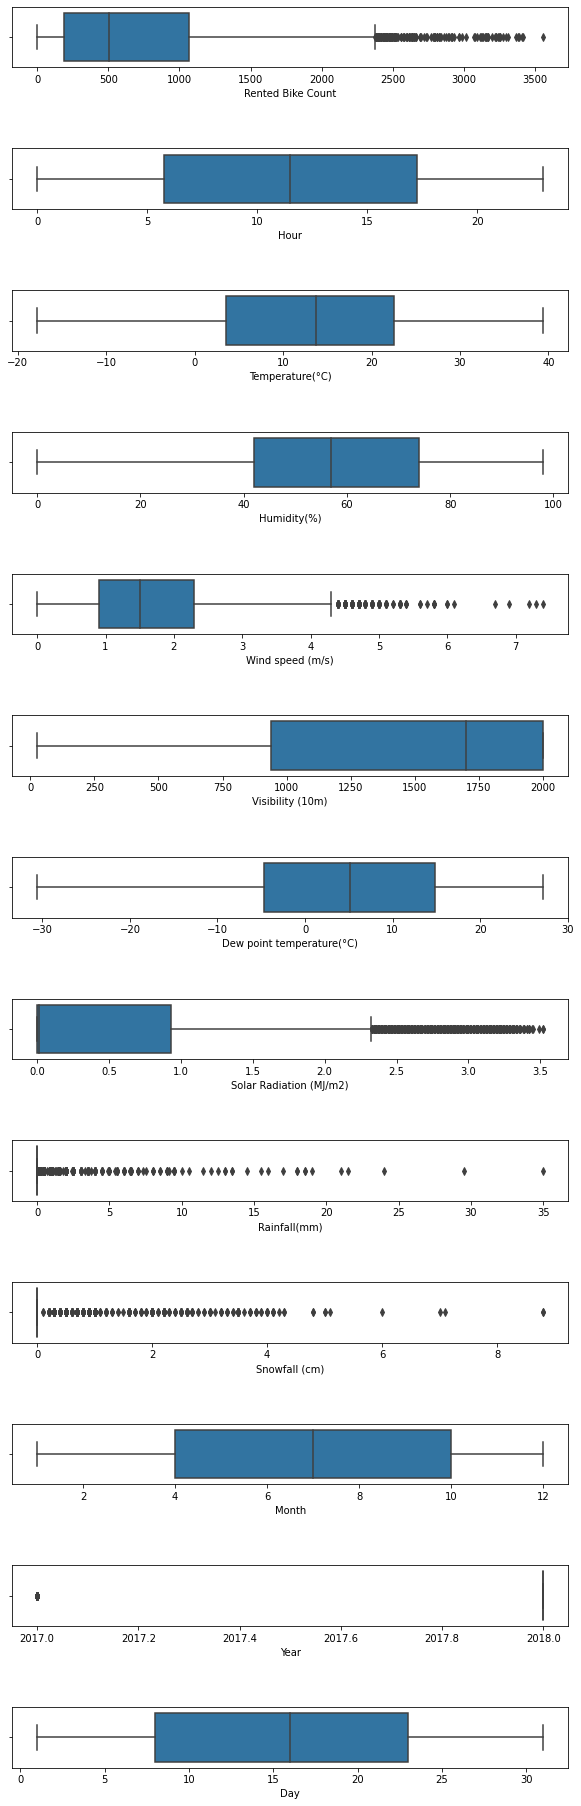

In [ ]:
#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in numerical_columns :
    plt.subplot(13,1, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=bd_df)
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# **Data visualization**

## *Correlation heatmap*

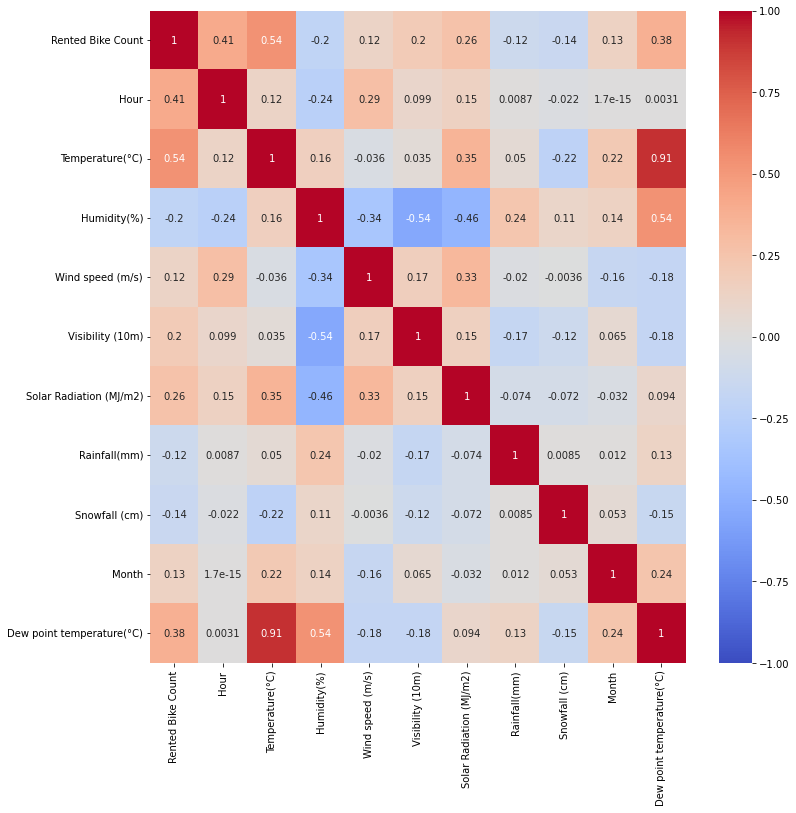

In [ ]:
#Correlation heatmap
plt.figure(figsize = (12,12))
sns.heatmap(bd_df[['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day','Month','Dew point temperature(°C)']].corr(),vmin=-1,vmax=1,annot=True,cmap='coolwarm')

* Dew point temperature is strongly correlated with temperature.
* Temperature,Hour shares a stronger correlation with Rented Bike count.

##  *Were rental services offered on non-functional days?*

In [ ]:
 bd_df.groupby(['Functioning Day','Holiday']).agg(bikerentalcounts=('Rented Bike Count',sum),no_of_holidays_nonholidays=('Date',lambda x: x.nunique()))

bikerentalcounts  no_of_holidays_nonholidays
Functioning Day Holiday                                                 
No              Holiday                    0                           1
                No Holiday                 0                          12
Yes             Holiday               215895                          17
                No Holiday           5956419                         336

## *Which are the days on which the service was unavailable?*

In [ ]:
non_functioning_days=bd_df.loc[bd_df['Functioning Day']=='No']

non_functioning_days.loc[non_functioning_days['Holiday']=='Holiday']['Date'].unique()

array(['2018-10-09T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
non_functioning_days.loc[non_functioning_days['Holiday']=='No Holiday'].groupby('Date')['Holiday'].value_counts().to_frame(name = 'Duration_of_non_operation').reset_index()

,Date,Holiday,Duration_of_non_operation
0,2018-04-11,No Holiday,24
1,2018-05-10,No Holiday,24
2,2018-09-18,No Holiday,24
3,2018-09-19,No Holiday,24
4,2018-09-28,No Holiday,24
5,2018-09-30,No Holiday,24
6,2018-10-02,No Holiday,24
7,2018-10-04,No Holiday,24
8,2018-10-06,No Holiday,7
9,2018-11-03,No Holiday,24


 Hangeul Day: It is a national Korean commemorative day marking the invention and the proclamation of Hangul , the alphabet of the Korean language

 April-1,May-1,Sept-4,Oct-3,Nov-3

##  *What is the likelihood of people renting bikes on holidays and non-holidays?*

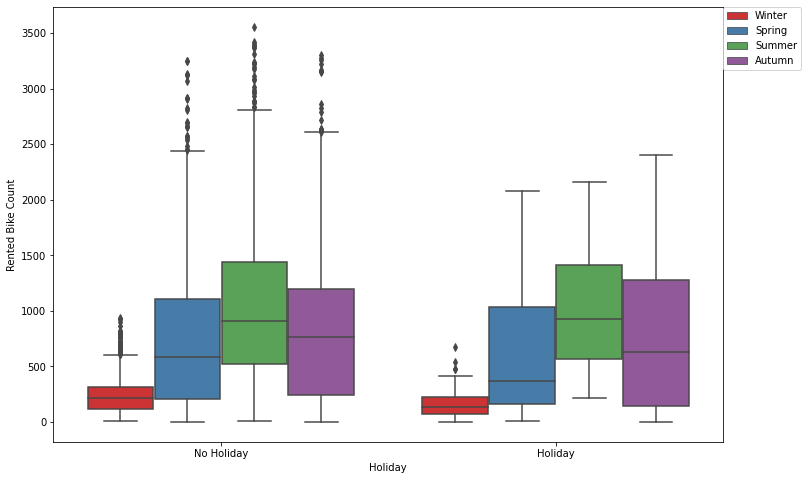

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Holiday',y='Rented Bike Count',data=bd_df,palette='Set1',hue='Seasons')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)

* Across all the seasons,we notice that the median of count of rented bikes is higher on non-Holidays.

## *What is the count of rented bikes during different seasons of the year?*

In [ ]:
season_df=bd_df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()['Rented Bike Count'].to_frame(name = 'season_count').reset_index()

In [ ]:
month_df=(bd_df.groupby(['Seasons','Month'])['Rented Bike Count'].sum()).to_frame(name = 'month_count').reset_index()

[None]

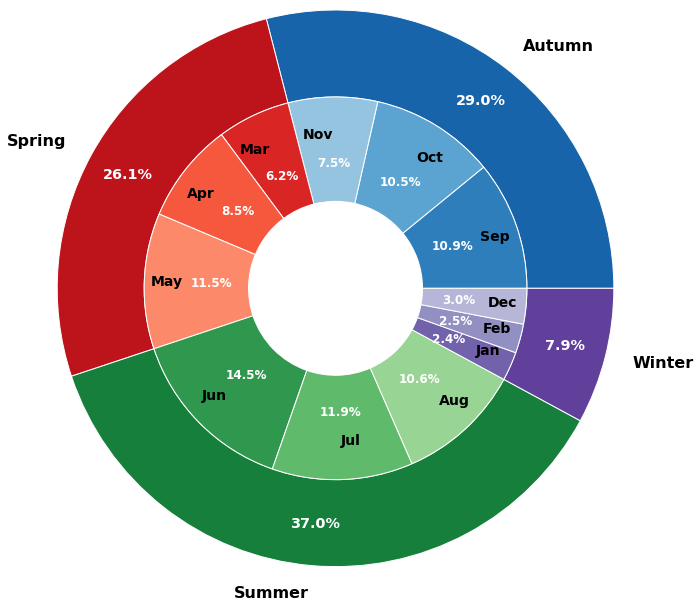

In [ ]:
import calendar
d = dict(enumerate(calendar.month_abbr))
subgroup_names = month_df['Month'].map(d)

fig, ax = plt.subplots()
size=1
group_names=['Autumn', 'Spring', 'Summer','Winter']
group_size=season_df['season_count']

subgroup_size=month_df['month_count']
a, b, c,d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]

# Setting figure colors
outer_colors = [a(.8), b(.8),c(.8),d(.8)]
inner_colors = [*a(np.linspace(.7, .4, 3)),*b(np.linspace(.7, .4, 3)),*c(np.linspace(.7, .4, 3)),*d(np.linspace(.7, .4, 3))]

#Creating nested pie chart
patches, texts,pcts=ax.pie(group_size, radius=3.2, colors=outer_colors,
      wedgeprops=dict(width=size, edgecolor='w'),labels=group_names,autopct='%1.1f%%', textprops={'fontsize':16,'size': 'x-large'},labeldistance=1.1,pctdistance=0.85)
plt.setp(pcts, color='white',fontweight='bold')
plt.setp(texts, fontweight=600)

patches1, texts1,pcts1=ax.pie(subgroup_size, radius=3.2-size, colors=inner_colors,labels=subgroup_names,
       wedgeprops=dict(width=1.2, edgecolor='w'),autopct='%1.1f%%', textprops={'fontsize': 14},labeldistance=0.8,pctdistance=0.65)
plt.setp(pcts1, color='w', fontweight='bold',fontsize=12)
plt.setp(texts1, fontweight=600)

ax.set(aspect="equal")


##  *What is the count of rented bikes on different months?*

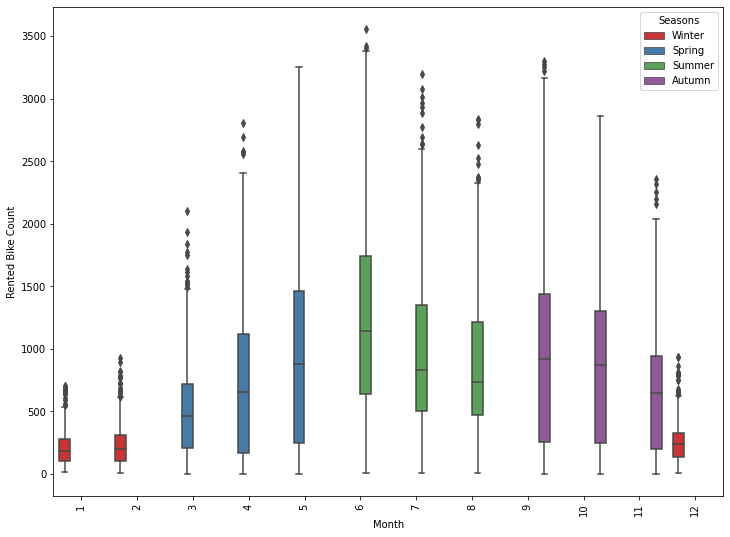

In [ ]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
sns.boxplot(x='Month',y='Rented Bike Count',data=bd_df,palette='Set1',hue='Seasons')

* The demand for rental bikes is lowest During Winters(Dec-Feb),highest during Summers(June-August)

##  *What is the demand for rental bikes during different days of the week?*

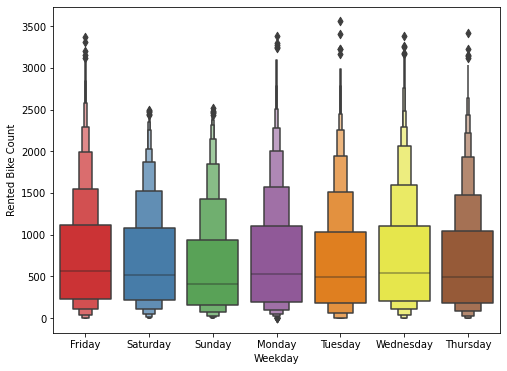

In [ ]:
plt.figure(figsize=(8,6))
sns.boxenplot(x='Days_of_week',y='Rented Bike Count',data=bd_df,palette='Set1')

* Least demand on Sunday,Slightly higher demand on Friday
* More demand on weekdays than weekends.

In [ ]:
bd_df.groupby(['Weekend'])['Rented Bike Count'].mean()

Weekend
N    719.448914
Y    667.342147
Name: Rented Bike Count, dtype: float64

##  *What is the demand for rental bikes during different hours of the day?*

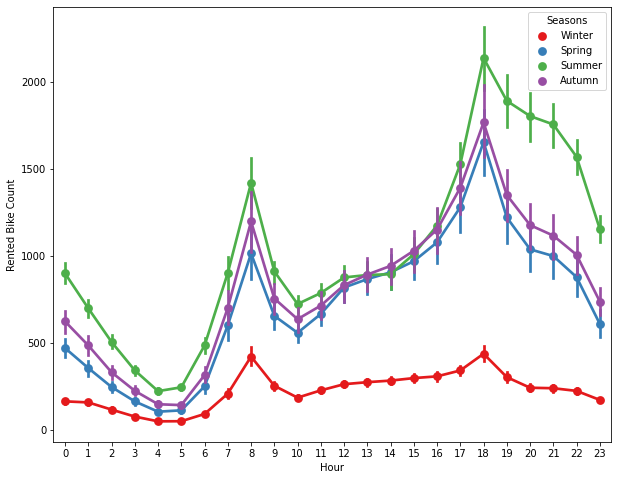

In [ ]:
plt.figure(figsize=(10,8))
sns.pointplot(x='Hour',y='Rented Bike Count',data=bd_df,palette='Set1',hue='Seasons')

* The demand for rental bikes is peaks at 8 (8:00 am) and 18 (6:00 PM ).
* This peak in demand coincides with opening and closing hours of various institutions and offices.
* The demand for rental bikes increases steadily after 10:00 AM and continues till 6:00 PM
* The demand for bikes is least during the early hours (1:00 AM to 6:00 AM)
* Regardless,of the seasons,this has been the general trend noticed.

##  *How does temperature affects the demand for rental bikes?*

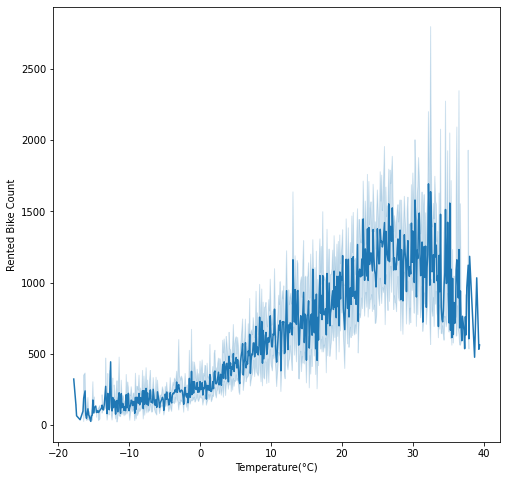

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x='Temperature(°C)',y='Rented Bike Count',data=bd_df)

* It can be seen that demand for rental bikes is greater during temperatures ranging from 25°C to 35°C.

## *What are the factors which influence the demand for rental bikes during a day?*

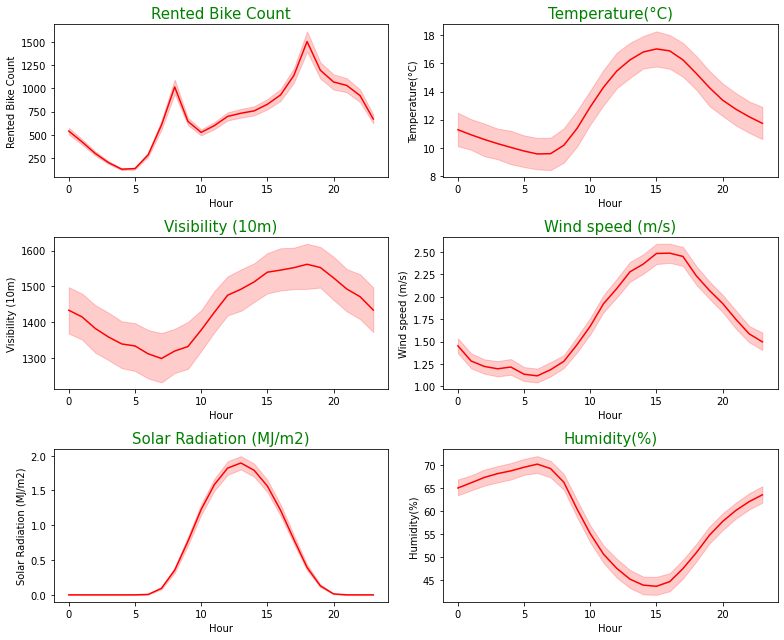

In [ ]:

fig = plt.figure(figsize=(11,9))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Humidity(%)']
for i in columns :
    plt.subplot(3,2,c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="green")
    sns.lineplot(data=bd_df, x='Hour', y=i, color='r')
    c = c + 1
plt.tight_layout()

* Temperature, visibility, windspeed, and humidity appear to be positively associated to the hourly demand for rental bikes. 
* The rented bike counts are highest during the hours from 15.00(3:00 PM) to 20.00 (8:00 PM), when the temperature is highest, there is the most visibility, windspeed, and humidity is lowest.

## *What are the factors which influence the demand for rental bikes over the period from Dec 2017 to Nov 2018 ?*

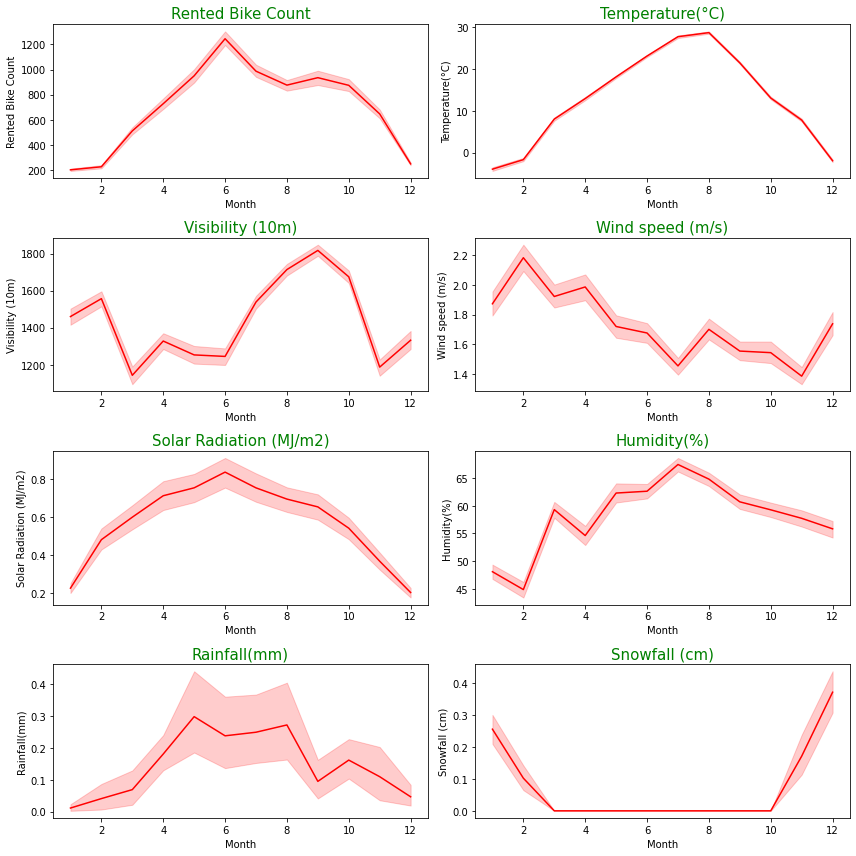

In [ ]:
fig = plt.figure(figsize=(12,12))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Humidity(%)','Rainfall(mm)','Snowfall (cm)']
for i in columns :
    plt.subplot(4,2, c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="green")
    sns.lineplot(data=bd_df, x='Month', y=i, color='r')
    c = c + 1
plt.tight_layout()  

* The monthly count of rented bikes is positively associated with Temperature. 
* Snowfall movement coincides with season, with heavy snowfall from January to March throughout the winter season. 
* Rainfall tends to be more frequent in Seoul from June to August, during the summer season.However,this has not lead to decline in demand for rental bikes during those months.


## *What are the factors which influence the demand for rental bikes during various seasons of the year?*

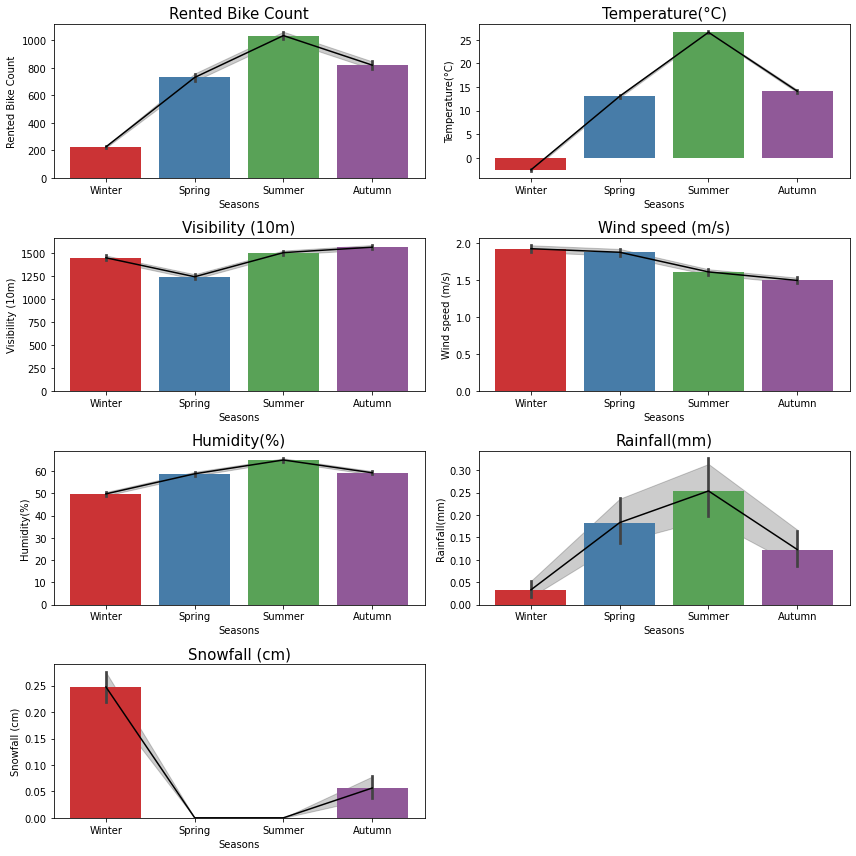

In [ ]:
fig = plt.figure(figsize=(12,12))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)', 'Humidity(%)','Rainfall(mm)', 'Snowfall (cm)']
for i in columns :
    plt.subplot(4,2,c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="black")
    sns.barplot(data=bd_df, x='Seasons', y=i, palette='Set1')
    sns.lineplot(data=bd_df, x='Seasons', y=i, color='black')
    c = c + 1
plt.tight_layout()

* It is evident that the seasonal demand for rental bikes is positively associated with temperature, solar radiation ,rainfall ,humidity and is negatively related with Snowfall received. 
* Therefore,the demand is highest during Summer season and least during winters



# ***Feature Engineering***

In [ ]:
# Checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_vif(dataframe):
  '''
  This function calculates the variance inflation factor of the independent features in the datasdet
  '''
  # the independent variables set
  X =dataframe
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  print(vif_data)                          

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
bd_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Days_of_week', 'Year', 'Day',
       'Weekend'],
      dtype='object')

In [ ]:
#checking VIF
check_vif(bd_df[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
        'Month','Year','Day']])

                      feature         VIF
0                        Hour    4.458880
1             Temperature(°C)  188.666573
2                 Humidity(%)  187.533688
3            Wind speed (m/s)    4.890096
4            Visibility (10m)   10.788995
5   Dew point temperature(°C)  126.954261
6     Solar Radiation (MJ/m2)    2.904971
7                Rainfall(mm)    1.103386
8               Snowfall (cm)    1.155412
9                       Month    5.108772
10                       Year  407.025112
11                        Day    4.379818


In [ ]:

#removing Year
check_vif(bd_df[['Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Month','Day', 'Dew point temperature(°C)']])

                      feature        VIF
0                        Hour   4.425960
1             Temperature(°C)  38.389623
2                 Humidity(%)   8.344305
3            Wind speed (m/s)   4.879565
4            Visibility (10m)   9.481423
5     Solar Radiation (MJ/m2)   2.900819
6                Rainfall(mm)   1.082134
7               Snowfall (cm)   1.144168
8                       Month   5.096115
9                         Day   4.292003
10  Dew point temperature(°C)  19.815223


Temperature is a more important feature than Dew point temperature.

In [ ]:
#VIF on removing year and Dew point temperature
check_vif(bd_df[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
        'Month','Day']])

                   feature       VIF
0                     Hour  3.997641
1          Temperature(°C)  3.288024
2              Humidity(%)  6.802299
3         Wind speed (m/s)  4.667341
4         Visibility (10m)  5.471035
5  Solar Radiation (MJ/m2)  2.275006
6             Rainfall(mm)  1.080689
7            Snowfall (cm)  1.139759
8                    Month  5.027060
9                      Day  3.776455


In [ ]:
#Dropping 'Dew point temperature(°C)','Year' to reduce the VIF
bd_df.drop(columns=['Dew point temperature(°C)','Year'],inplace=True)

In [ ]:
bd_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Month', 'Weekday', 'Day', 'Weekend'],
      dtype='object')

In [ ]:
#Creating a copy of the main dataframe 'bd_df'
df_copy=bd_df.copy()

In [ ]:
#Dummification of categorical columns
columns_=['Seasons','Holiday','Weekend','Functioning Day']
dummy_categorical_features = pd.get_dummies(bd_df[columns_],drop_first=True)
dummy_categorical_features.head(2)


,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Weekend_Y,Functioning Day_Yes
0,0,0,1,1,0,1
1,0,0,1,1,0,1


In [ ]:
#Merging the dataframes with encoded features

list_of_df = [df_copy,dummy_categorical_features]
df=pd.concat(list_of_df, axis=1)
df.drop(['Seasons','Days_of_week','Weekend','Functioning Day','Holiday','Date'], axis=1, inplace=True)

In [ ]:
df.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Weekend_Y,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,1,0,0,1,1,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,1,0,0,1,1,0,1


# **Model Evaluation**

## ***Polynomial Regression***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [ ]:
#Defining independent and dependent variables

y = df['Rented Bike Count']
X = df.drop('Rented Bike Count',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
  X.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Month', 'Day', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Weekend_Y',
       'Functioning Day_Yes'],
      dtype='object')

In [ ]:
X.head(2)

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,...,Month,Days_of_week,Day,Weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Weekend_Y,Functioning Day_Yes
0,2017-12-01,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,...,12,Friday,1,N,0,0,1,1,0,1
1,2017-12-01,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,...,12,Friday,1,N,0,0,1,1,0,1


In [ ]:
def errors_model(y_true,y_pred):

  '''
  This function calculate  errors for evaluating 
  the perfomance of Regression models
  '''
  #calculating mean absolute error 
  MAE =  mean_absolute_error(y_true,y_pred)
  print(f'MAE : {MAE}')
    
  #finding mean_squared_error
  MSE  = mean_squared_error(y_true,y_pred)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

def scores_model(X_true,y_true,y_pred):  
  '''
  This function calculate  scores for evaluating 
  the perfomance of Regression models
  '''  
  #finding the r2 score
  r2 = r2_score(y_true,y_pred)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_true,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  

In [ ]:
#Scaling the features 
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [ ]:
# degrees=[1,2,3,4,5]
# train_scores=[]
# test_scores=[]
# # poly_regressors={}

# for value in degrees:

#   poly_features = PolynomialFeatures(degree = value)
#   X_train_poly = poly_features.fit_transform(X_train_scaled)
#   poly_regressor = LinearRegression( )
#   poly_regressor.fit(X_train_poly, y_train)
#   X_test_transform=poly_features.transform(X_test_scaled)
#   X_train_transform=poly_features.transform(X_train_scaled)
#    # predicting on training data-set
#   y_train_pred = poly_regressor.predict(X_train_poly)
  
#   # predicting on test data-set
#   y_test_pred = poly_regressor.predict(poly_features.fit_transform(X_test))

#  #calculating train and test scores for each degree polynomial
#   train_scores.append(poly_regressor.score(X_train_poly, y_train))
#   test_scores.append(poly_regressor.score(X_test_transform, y_test))

#   # poly_regressors[value]=poly_regressor

In [ ]:
# best_degree=degrees[test_scores.index(max(test_scores))]

In [ ]:
#importing the packages required for preprocessing,creating pipeline,cross-validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
def PolynomialRegression(degree=1, **kwargs):#initializing the degree as 1,however the degree will change during cross-validation
  '''
  This function transforms the independent features(X_train) to a polynomial of the degree given in the parameters 
  and performs Linear regression using the  y_train(not-transformed) and the transformed X_train.
  '''
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [ ]:
parameters = {'polynomialfeatures__degree': [1,2,3,4,5]}
poly_regressor = PolynomialRegression()
poly_grid = GridSearchCV(poly_regressor, param_grid=parameters,cv=3, scoring='neg_mean_squared_error', verbose=3) 
poly_grid.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END polynomialfeatures__degree=1;, score=-194984.272 total time=   0.0s
[CV 2/3] END polynomialfeatures__degree=1;, score=-180268.168 total time=   0.0s
[CV 3/3] END polynomialfeatures__degree=1;, score=-182068.309 total time=   0.0s
[CV 1/3] END polynomialfeatures__degree=2;, score=-120304.297 total time=   0.1s
[CV 2/3] END polynomialfeatures__degree=2;, score=-110301.937 total time=   0.1s
[CV 3/3] END polynomialfeatures__degree=2;, score=-114460.728 total time=   0.1s
[CV 1/3] END polynomialfeatures__degree=3;, score=-2670666553.749 total time=   0.9s
[CV 2/3] END polynomialfeatures__degree=3;, score=-477532048.852 total time=   0.8s
[CV 3/3] END polynomialfeatures__degree=3;, score=-46463747.549 total time=   0.8s
[CV 1/3] END polynomialfeatures__degree=4;, score=-1031940212.823 total time=  45.7s
[CV 2/3] END polynomialfeatures__degree=4;, score=-1420015552.449 total time=  58.6s
[CV 3/3] END polynomialfeatures_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=1)),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
best_degree=poly_grid.best_params_['polynomialfeatures__degree']


In [ ]:
#Fitting the features to a polynomial of degree which best fits the data

poly_features = PolynomialFeatures(degree = best_degree)
X_train_poly = poly_features.fit_transform(X_train)
poly_regressor = LinearRegression( )
poly_regressor.fit(X_train_poly, y_train)

#Predicting the y values from X_test

X_test_transform=poly_features.transform(X_test)
y_pred=poly_regressor.predict(X_test_transform)


In [ ]:
#Determining the evaluation metrics of the model
print(f'The polynomial with degree {best_degree} is optimal fit')
errors_model(y_test,y_pred)
scores_model(X_test_scaled,y_test,y_pred)

The polynomial with degree 2 is optimal fit
MAE : 241.71332990540085
MSE : 135169.52184128363
RMSE : 367.6540790488848
R2 : 0.6701493770469964
Adjusted R2 :  0.6681280787064188


# **CatBoost Regressor**

In [ ]:
#installing catboost
!pip install catboost

     |████████████████████████████████| 76.1 MB 27.8 MB/s 


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
X.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day', 'Month',
       'Day', 'Weekend'],
      dtype='object')

In [ ]:
X=bd_df.drop(columns=['Date','Rented Bike Count','Weekday'])
y=bd_df['Rented Bike Count']

In [ ]:
#List of categorical columns
categorical_columns = X.select_dtypes(include=["object"]).columns.tolist()
print("Names of categorical columns : ", categorical_columns)
#Get location of categorical columns
categorical_features_indices = [X.columns.get_loc(col) for col in categorical_columns]
print("Location of categorical columns : ",categorical_features_indices)

Names of categorical columns :  ['Seasons', 'Holiday', 'Functioning Day', 'Weekend']
Location of categorical columns :  [8, 9, 10, 13]


In [ ]:
#Splitting the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

* **Catboost model with default set of parameters**

In [ ]:

# creating Catboost model
CB_regressor= CatBoostRegressor( loss_function='RMSE')

 # train the model
CB_regressor.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),verbose=False,plot=False)

In [ ]:

#Make predictions and evalution of Catboost model

print(f'Training score:{CB_regressor.score(X_train,y_train)}')

y_pred=CB_regressor.predict(X_test)

print(f'\n Evaluation metrics (Test data)')
errors_model(y_test,y_pred)
scores_model(X_test,y_test,y_pred)

Training score:0.9781454870001953

 Evaluation metrics (Test data)
MAE : 91.88171116314396
MSE : 24268.891333672378
RMSE : 155.78475963223224
R2 : 0.9407772638702517
Adjusted R2 :  0.9404599587398206


Text(0, 0.5, 'Feature name')

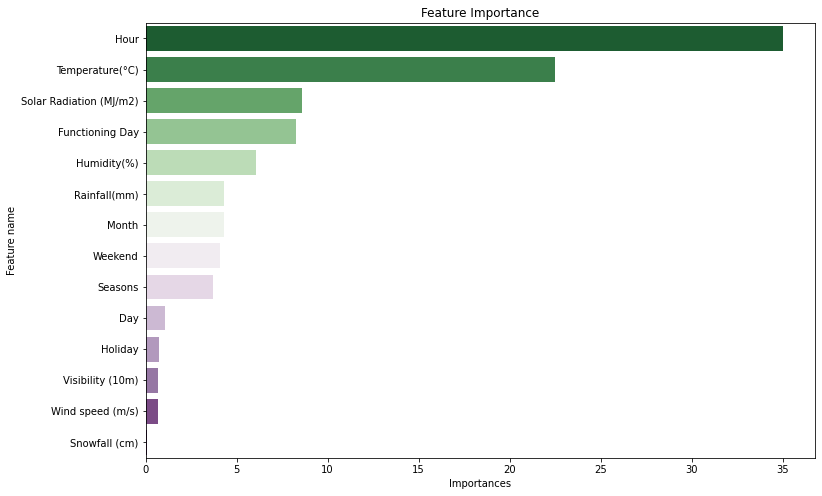

In [ ]:
# Create a dataframe of feature importance 
feature_imp = pd.DataFrame(CB_regressor.get_feature_importance(prettified=True))

#Visualizing features importance of catboost model
plt.figure(figsize=(12, 8))
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=feature_imp,palette="PRGn_r");
plt.title('Feature Importance')
plt.ylabel('Feature name')

* Catboost model with Hyperparameter tuning

In [ ]:
#Finding the optimal parameters by Grid Search Cross Validation

parameters = {'depth' : [8,10,6],'learning_rate' : [0.01, 0.05, 0.1,0.025],'iterations':[50,100,150]}
CB_regressor = CatBoostRegressor(iterations=50, loss_function='RMSE',cat_features=categorical_features_indices)
grid = GridSearchCV(estimator=CB_regressor, param_grid = parameters, cv = 5, n_jobs=-1)
grid.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)

0:	learn: 604.8756480	total: 37.8ms	remaining: 5.64s
1:	learn: 566.4568764	total: 62.3ms	remaining: 4.61s
2:	learn: 533.7650375	total: 79ms	remaining: 3.87s
3:	learn: 498.9396166	total: 95.2ms	remaining: 3.47s
4:	learn: 471.0906742	total: 111ms	remaining: 3.22s
5:	learn: 444.9586976	total: 127ms	remaining: 3.04s
6:	learn: 422.5013627	total: 143ms	remaining: 2.93s
7:	learn: 402.4425160	total: 160ms	remaining: 2.83s
8:	learn: 383.8242272	total: 176ms	remaining: 2.75s
9:	learn: 367.6793398	total: 192ms	remaining: 2.69s
10:	learn: 353.5797461	total: 216ms	remaining: 2.73s
11:	learn: 341.6370795	total: 233ms	remaining: 2.68s
12:	learn: 330.5124349	total: 254ms	remaining: 2.67s
13:	learn: 318.2815240	total: 270ms	remaining: 2.62s
14:	learn: 309.3458991	total: 287ms	remaining: 2.58s
15:	learn: 300.9229264	total: 303ms	remaining: 2.54s
16:	learn: 291.9978411	total: 319ms	remaining: 2.5s
17:	learn: 281.2418942	total: 335ms	remaining: 2.46s
18:	learn: 270.9996559	total: 351ms	remaining: 2.42s
19

In [ ]:
# creating Catboost model
CB_regressor= CatBoostRegressor(iterations=150,depth=10,learning_rate=0.1, loss_function='RMSE')

 # train the model
CB_regressor.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),verbose=False,plot=False)

In [ ]:

#Make predictions and evalution of Catboost model

print(f'Training score:{CB_regressor.score(X_train,y_train)}')

y_pred=CB_regressor.predict(X_test)

print(f'\n Evaluation metrics (Test data)')
errors_model(y_test,y_pred)
scores_model(X_test,y_test,y_pred)

Training score:0.9707147668892531

 Evaluation metrics (Test data)
MAE : 94.19685513281946
MSE : 25826.142225471856
RMSE : 160.7051406317541
R2 : 0.9369771455465565
Adjusted R2 :  0.9366394800424049


Text(0, 0.5, 'Feature name')

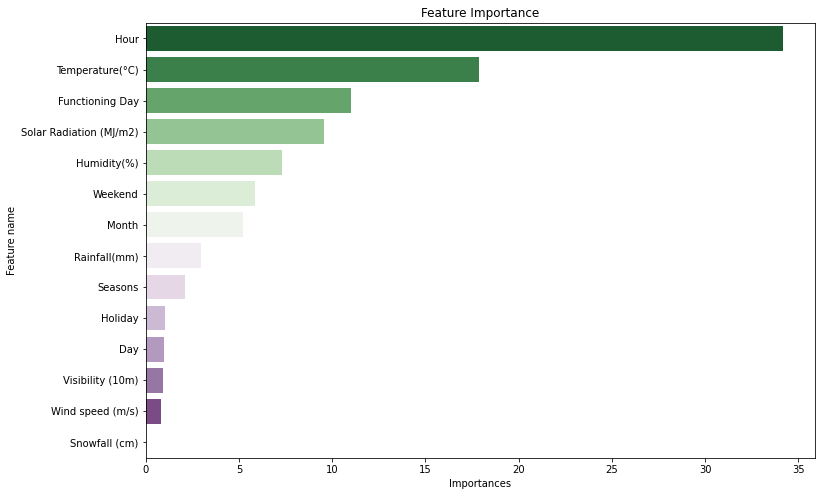

In [ ]:
# Create a dataframe of feature importance 
feature_imp = pd.DataFrame(CB_regressor.get_feature_importance(prettified=True))

#Visualizing features importance of catboost model
plt.figure(figsize=(12, 8))
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=feature_imp,palette="PRGn_r");
plt.title('Feature Importance')
plt.ylabel('Feature name')